In [1]:
%load_ext blackcellmagic

In [1]:
import tweepy
from decouple import config

In [2]:
TWITTER_AUTH = tweepy.OAuthHandler(config('TWITTER_CONSUMER_KEY'),config('TWITTER_CONSUMER_SECRET'))

TWITTER_AUTH.set_access_token(config('TWITTER_ACCESS_TOKEN'),config('TWITTER_ACCESS_TOKEN_SECRET'))

TWITTER = tweepy.API(TWITTER_AUTH)

In [3]:
import re
from collections import Counter

In [4]:
def check_num_tweets(search):
    twitter_user = TWITTER.get_user(search)
    tweets = twitter_user.timeline(
                count=2000,
                exclude_replies=False,
                include_rts=True,
                tweet_mode='extended'
    )
    return tweets

In [5]:
t = check_num_tweets("webdevmason")

In [6]:
len(t)

200

In [4]:
def get_first_user_interactions(search):
    twitter_user = TWITTER.get_user(search)
    tweets = twitter_user.timeline(
        count=200, exclude_replies=False, include_rts=True, tweet_mode="extended"
    )
    b = [i.full_text for i in tweets]
    b = " ".join(b)
    b = b.lower()
    b = b.replace(search, "")
    interactions = re.findall(
        r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", b
    )
    # counter returns an object with a count for each account
    interactions = [i[0] for i in Counter(interactions).most_common(10)]
    interactions.append(search)
    return interactions

In [8]:
a = get_first_user_interactions("webdevmason")

In [9]:
a

['kevinsimler',
 'visakanv',
 'austen',
 'joefyhrceesay',
 'paulg',
 'spakhm',
 'homsit',
 'jonathan_blow',
 'andy_matuschak',
 'tristanharris',
 'webdevmason']

In [10]:
first = Counter(a).most_common(10)

In [11]:
first

[('kevinsimler', 1),
 ('visakanv', 1),
 ('austen', 1),
 ('joefyhrceesay', 1),
 ('paulg', 1),
 ('spakhm', 1),
 ('homsit', 1),
 ('jonathan_blow', 1),
 ('andy_matuschak', 1),
 ('tristanharris', 1)]

In [12]:
def get_first_user_connections(search):
    twitter_user = TWITTER.get_user(search)
    tweets = twitter_user.timeline(
                count=1000,
                exclude_replies=False,
                include_rts=True,
                tweet_mode='extended'
    )
    b = [ i.full_text for i in tweets ]
    b = " ".join(b)
    b = b.lower()
    b = b.replace(search, "")
    interactions = re.findall(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)',b)
    interactions = " ".join(interactions)
    interactions_list.append(interactions)
    index.append(search)
    return interactions

In [13]:
type(first)

list

In [14]:
interactions_list = []
index = []
get_first_user_connections("webdevmason")
for i in range(len(a)):
    get_first_user_connections(a[i][0])

TweepError: [{'code': 63, 'message': 'User has been suspended.'}]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = interactions_list
vectorizer = CountVectorizer(min_df=2)
X = vectorizer.fit_transform(corpus)

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", 100)
display_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index=index)

In [ ]:
display_df

In [ ]:
import numpy as np

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
DG=nx.MultiGraph()

#loop through index, then the columns to find non-zero connections.
for i in display_df.index.values:
    for j in display_df.columns:
        if display_df[j].loc[i] >0 :
            DG.add_edge(j,i, weight = np.sqrt(display_df[j].loc[i] ))
        else:
            pass
        



In [ ]:
test_a = get_first_user_connections("webdevmason")

In [30]:
sorted(str.split(test_a, " "))

['aaronchall',
 'abstractify',
 'alaskaair',
 'alaskaair',
 'andy_matuschak',
 'andy_matuschak',
 'andy_matuschak',
 'andy_matuschak',
 'andy_matuschak',
 'andy_matuschak',
 'andyh2',
 'anki',
 'artirkel',
 'austen',
 'austen',
 'austen',
 'austen',
 'austen',
 'austen',
 'austen',
 'austen',
 'austen',
 'austen',
 'austen',
 'avram_twitchell',
 'babarganesh',
 'basilmarte',
 'belgarvm',
 'belgarvm',
 'belgarvm',
 'belgarvm',
 'briantheligman',
 'briantheligman',
 'clairlemon',
 'clairlemon',
 'conceptualjames',
 'couchrambo',
 'danielgross',
 'daviddeutschoxf',
 'daviddeutschoxf',
 'dellannaluca',
 'dellannaluca',
 'diachronist',
 'djd_allday',
 'djinnius',
 'djinnius',
 'ericrweinstein',
 'ericrweinstein',
 'freddier',
 'generalslug',
 'grumplessgrinch',
 'hermesofreason',
 'homsit',
 'homsit',
 'homsit',
 'homsit',
 'homsit',
 'homsit',
 'homsit',
 'homsit',
 'humansofny',
 'hunterjayperson',
 'hunterjayperson',
 'hunterjayperson',
 'hunterjayperson',
 'james_barton',
 'james_barton

In [31]:
edges = nx.to_pandas_edgelist(DG)

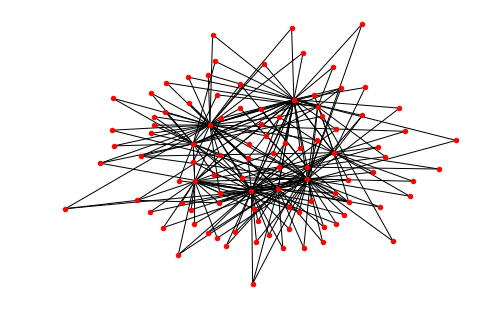

In [33]:
nx.draw_kamada_kawai(DG,node_size=20)

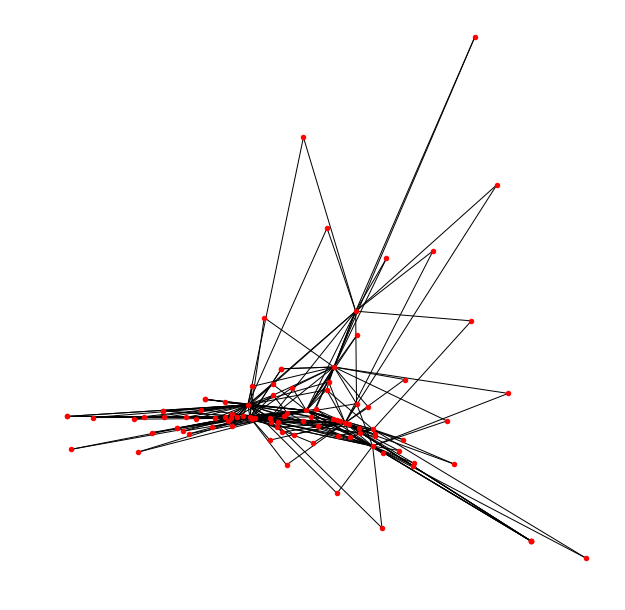

In [34]:
fig = plt.figure(figsize=(8,8))
nx.draw_spectral(DG,node_size=20)
plt.show()

## trying k-nearest neighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [79]:
sl_nodes = nx.spectral_layout(DG)

In [69]:
sl_nodes["alaskaair"]

array([ 0.1466937 , -0.11739134])

In [137]:
sl_nodes

{'alaskaair': array([ 0.1466937 , -0.11739134]),
 'webdevmason': array([ 0.0092896, -0.0022608]),
 'andy_matuschak': array([0.05899678, 0.11444965]),
 'andyh2': array([ 0.27635618, -0.14664208]),
 'artirkel': array([ 0.10412281, -0.04887764]),
 'austen': array([-0.11633948, -0.01968039]),
 'belgarvm': array([ 0.0650638 , -0.02906817]),
 'clairlemon': array([-0.05107036,  0.06807053]),
 'danielgross': array([-0.13281162, -0.03100308]),
 'daviddeutschoxf': array([-0.08921724, -0.02572923]),
 'dellannaluca': array([ 0.0868847 , -0.03988905]),
 'ericrweinstein': array([0.04946723, 0.07427256]),
 'humansofny': array([-0.13836687,  0.01984835]),
 'james_barton': array([ 0.05749128, -0.02514977]),
 'jonathan_blow': array([ 0.12962201, -0.05331184]),
 'juliagalef': array([0.10113088, 0.20120924]),
 'kevinsimler': array([ 0.0791892 , -0.03556247]),
 'kingofhype': array([-0.03181229, -0.01821944]),
 'michael_nielsen': array([0.04571498, 0.05323655]),
 'nileshtrivedi': array([-0.1730526 ,  0.0276

In [140]:
def get_column_sum(i):
    try:
        return display_df[i].sum()
    except:
        return 1

In [141]:
node_weights = [ get_column_sum(i) for i in list(sl_nodes)]

In [144]:
node_weights

[4,
 61,
 8,
 2,
 7,
 31,
 5,
 7,
 3,
 5,
 9,
 9,
 3,
 6,
 9,
 3,
 31,
 11,
 48,
 2,
 18,
 5,
 27,
 7,
 3,
 13,
 11,
 2,
 2,
 18,
 15,
 16,
 11,
 4,
 2,
 3,
 3,
 4,
 5,
 6,
 3,
 3,
 2,
 11,
 7,
 2,
 19,
 2,
 9,
 7,
 2,
 17,
 9,
 10,
 2,
 26,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 9,
 3,
 2,
 35,
 9,
 3,
 4,
 2,
 4,
 1,
 3,
 17,
 4,
 4,
 3,
 6,
 2,
 2,
 4,
 3,
 3,
 2,
 4,
 3,
 2,
 14,
 6,
 5,
 3,
 1,
 4,
 2,
 28,
 4,
 3,
 5,
 2]

In [ ]:
neigh = NearestNeighbors(2, 0.4)
neigh.fit(sl_nodes) 

## experimenting with cliques

In [ ]:
from networkx.algorithms.community import k_clique_communities
c = list(k_clique_communities(DG, 4))

## experimenting with edges and weights

In [85]:
edges = list(DG.edges.data())
"""edges": [
    {
      "id": "e0",
      "source": "n0",
      "target": "n1"
    },
    {
      "id": "e1",
      "source": "n1",
      "target": "n2"
    },
    {
      "id": "e2",
      "source": "n2",
      "target": "n0"
    }
  ]
}"""

'edges": [\n    {\n      "id": "e0",\n      "source": "n0",\n      "target": "n1"\n    },\n    {\n      "id": "e1",\n      "source": "n1",\n      "target": "n2"\n    },\n    {\n      "id": "e2",\n      "source": "n2",\n      "target": "n0"\n    }\n  ]\n}'

In [87]:
#edges_dict = [ {"source": edge[0],"target":edge[1], "weight" : edge[2]["weight"]} for edge in edges]
edges_dict = [ {"id": edge[0]+" "+ edge[1],"source": edge[0],"target":edge[1]} for edge in edges]

In [89]:
edge_json = { "edges" : edges_dict}

In [90]:
edge_json

{'edges': [{'id': 'alaskaair webdevmason',
   'source': 'alaskaair',
   'target': 'webdevmason'},
  {'id': 'alaskaair visakanv', 'source': 'alaskaair', 'target': 'visakanv'},
  {'id': 'webdevmason andy_matuschak',
   'source': 'webdevmason',
   'target': 'andy_matuschak'},
  {'id': 'webdevmason andy_matuschak',
   'source': 'webdevmason',
   'target': 'andy_matuschak'},
  {'id': 'webdevmason andyh2', 'source': 'webdevmason', 'target': 'andyh2'},
  {'id': 'webdevmason artirkel',
   'source': 'webdevmason',
   'target': 'artirkel'},
  {'id': 'webdevmason austen', 'source': 'webdevmason', 'target': 'austen'},
  {'id': 'webdevmason austen', 'source': 'webdevmason', 'target': 'austen'},
  {'id': 'webdevmason belgarvm',
   'source': 'webdevmason',
   'target': 'belgarvm'},
  {'id': 'webdevmason clairlemon',
   'source': 'webdevmason',
   'target': 'clairlemon'},
  {'id': 'webdevmason danielgross',
   'source': 'webdevmason',
   'target': 'danielgross'},
  {'id': 'webdevmason daviddeutschoxf'

In [ ]:
rows = [edges_dict[i] for i in range(0,len(edges_dict)) if
        (edges_dict[i]["target"]== "visakanv")|
        (edges_dict[i]["target"]== "paulg")|
        (edges_dict[i]["target"]=="austen") ]


In [ ]:
rows2 = sorted(rows, key=lambda k: k["weight"],reverse=True)

In [ ]:
rows2

In [91]:
"""{
  "nodes": [
    {
      "id": "n0",
      "label": "A node",
      "x": 0,
      "y": 0,
      "size": 3
    },
    {
      "id": "n1",
      "label": "Another node",
      "x": 3,
      "y": 1,
      "size": 2
    },"""

'{\n  "nodes": [\n    {\n      "id": "n0",\n      "label": "A node",\n      "x": 0,\n      "y": 0,\n      "size": 3\n    },\n    {\n      "id": "n1",\n      "label": "Another node",\n      "x": 3,\n      "y": 1,\n      "size": 2\n    },'

In [106]:
nodes_dict = [ {"id": i, "label": i, "x": sl_nodes[i][0], "y":sl_nodes[i][1] } for i in list(sl_nodes)]

In [121]:
nodes_dict

[{'id': 'alaskaair',
  'label': 'alaskaair',
  'x': 0.14669370094303114,
  'y': -0.11739134461330394},
 {'id': 'webdevmason',
  'label': 'webdevmason',
  'x': 0.009289598747290235,
  'y': -0.002260802054745617},
 {'id': 'andy_matuschak',
  'label': 'andy_matuschak',
  'x': 0.05899678479689541,
  'y': 0.11444964838789153},
 {'id': 'andyh2',
  'label': 'andyh2',
  'x': 0.2763561801307978,
  'y': -0.14664208164854095},
 {'id': 'artirkel',
  'label': 'artirkel',
  'x': 0.10412281124903816,
  'y': -0.048877644501825836},
 {'id': 'austen',
  'label': 'austen',
  'x': -0.1163394809657136,
  'y': -0.019680392713749648},
 {'id': 'belgarvm',
  'label': 'belgarvm',
  'x': 0.06506379804433159,
  'y': -0.02906816894966527},
 {'id': 'clairlemon',
  'label': 'clairlemon',
  'x': -0.051070361251449425,
  'y': 0.0680705311172544},
 {'id': 'danielgross',
  'label': 'danielgross',
  'x': -0.13281161619740423,
  'y': -0.031003075952501118},
 {'id': 'daviddeutschoxf',
  'label': 'daviddeutschoxf',
  'x': -

In [116]:
data = (nodes_json, edge_json)

In [117]:
import json

In [120]:
with open('data.json', 'w') as outfile:
    json.dump(nodes_dict, outfile)

In [ ]:
edges[0][2]["weight"]

In [81]:
sl_nodes[edges[0][0]][0]
sl_nodes[edges[0][0]][1]

-0.11739134461330394

In [133]:
node_list = list(sl_nodes)
node_x = [sl_nodes[i][0] for i in node_list]
node_y = [sl_nodes[i][1] for i in node_list]

In [82]:
sl_edges_x = []
sl_edges_y = []
sl_edges_weight = []
for i in range(len(edges)):
    sl_edges_x.append(sl_nodes[edges[i][0]][0])
    sl_edges_y.append(sl_nodes[edges[i][0]][1])
    sl_edges_x.append(sl_nodes[edges[i][1]][0])
    sl_edges_y.append(sl_nodes[edges[i][1]][1])
    sl_edges_weight.append(edges[i][2]["weight"])
    sl_edges_weight.append(edges[i][2]["weight"])
    sl_edges_x.append("")
    sl_edges_y.append("")
    sl_edges_weight.append("")

In [83]:
sl_edges_x

[0.14669370094303114,
 0.009289598747290235,
 '',
 0.14669370094303114,
 0.12878095830971154,
 '',
 0.009289598747290235,
 0.05899678479689541,
 '',
 0.009289598747290235,
 0.05899678479689541,
 '',
 0.009289598747290235,
 0.2763561801307978,
 '',
 0.009289598747290235,
 0.10412281124903816,
 '',
 0.009289598747290235,
 -0.1163394809657136,
 '',
 0.009289598747290235,
 -0.1163394809657136,
 '',
 0.009289598747290235,
 0.06506379804433159,
 '',
 0.009289598747290235,
 -0.051070361251449425,
 '',
 0.009289598747290235,
 -0.13281161619740423,
 '',
 0.009289598747290235,
 -0.0892172378008951,
 '',
 0.009289598747290235,
 0.08688470016119096,
 '',
 0.009289598747290235,
 0.049467227950834025,
 '',
 0.009289598747290235,
 -0.1383668691948592,
 '',
 0.009289598747290235,
 0.057491281771954166,
 '',
 0.009289598747290235,
 0.12962201203878843,
 '',
 0.009289598747290235,
 0.12962201203878843,
 '',
 0.009289598747290235,
 0.10113088259798744,
 '',
 0.009289598747290235,
 0.0791891957063367,
 ''

## experimenting with plotting json, js, etc

In [ ]:
import json

In [ ]:
x = json.dumps(sl_edges_x)
y = json.dumps(sl_edges_y)
weights = json.dumps(sl_edges_weight)

In [ ]:
print(x)

In [ ]:
with open('x.json', 'w') as outfile:
    json.dump(x, outfile)
with open('y.json', 'w') as outfile:
    json.dump(y, outfile)
with open('weights.json', 'w') as outfile:
    json.dump(weights, outfile)

In [ ]:
#!pip install pixiedust --upgrade
#!pip install pixiedust_node --upgrade

In [ ]:
#import pixiedust_node

In [ ]:
%%node
var d_x = fs.readFileSync("E:/ds/labs12-twitter-blocker-DS/x.json");
var d_y = fs.readFileSync("E:/ds/labs12-twitter-blocker-DS/y.json");
var d_w = fs.readFileSync("E:/ds/labs12-twitter-blocker-DS/weights.json");
console.log(d_x)

## Matrix Multiplication
Really don't need the graph library 

In [ ]:
x2 = X @ X.T
pd.DataFrame(x2.toarray(), columns = index, index = index)